In [ ]:
!pip install statsmodels prophet

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = '/content/daily-website-visitors.csv'
website_data = pd.read_csv(data)

In [9]:
website_data.info()
print(website_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB
   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday     

In [10]:
# Remove commas from the columns and convert to numeric types
website_data['Page.Loads'] = website_data['Page.Loads'].str.replace(',', '').astype(int)
website_data['Unique.Visits'] = website_data['Unique.Visits'].str.replace(',', '').astype(int)
website_data['First.Time.Visits'] = website_data['First.Time.Visits'].str.replace(',', '').astype(int)
website_data['Returning.Visits'] = website_data['Returning.Visits'].str.replace(',', '').astype(int)

# Convert 'Date' column to datetime format
website_data['Date'] = pd.to_datetime(website_data['Date'], format='%m/%d/%Y')

# Display cleaned data types and first few rows again
cleaned_data_info = website_data.info()
cleaned_data_head = website_data.head()

cleaned_data_info, cleaned_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   int64         
 5   Unique.Visits      2167 non-null   int64         
 6   First.Time.Visits  2167 non-null   int64         
 7   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 135.6+ KB


(None,
    Row        Day  Day.Of.Week       Date  Page.Loads  Unique.Visits  \
 0    1     Sunday            1 2014-09-14        2146           1582   
 1    2     Monday            2 2014-09-15        3621           2528   
 2    3    Tuesday            3 2014-09-16        3698           2630   
 3    4  Wednesday            4 2014-09-17        3667           2614   
 4    5   Thursday            5 2014-09-18        3316           2366   
 
    First.Time.Visits  Returning.Visits  
 0               1430               152  
 1               2297               231  
 2               2352               278  
 3               2327               287  
 4               2130               236  )

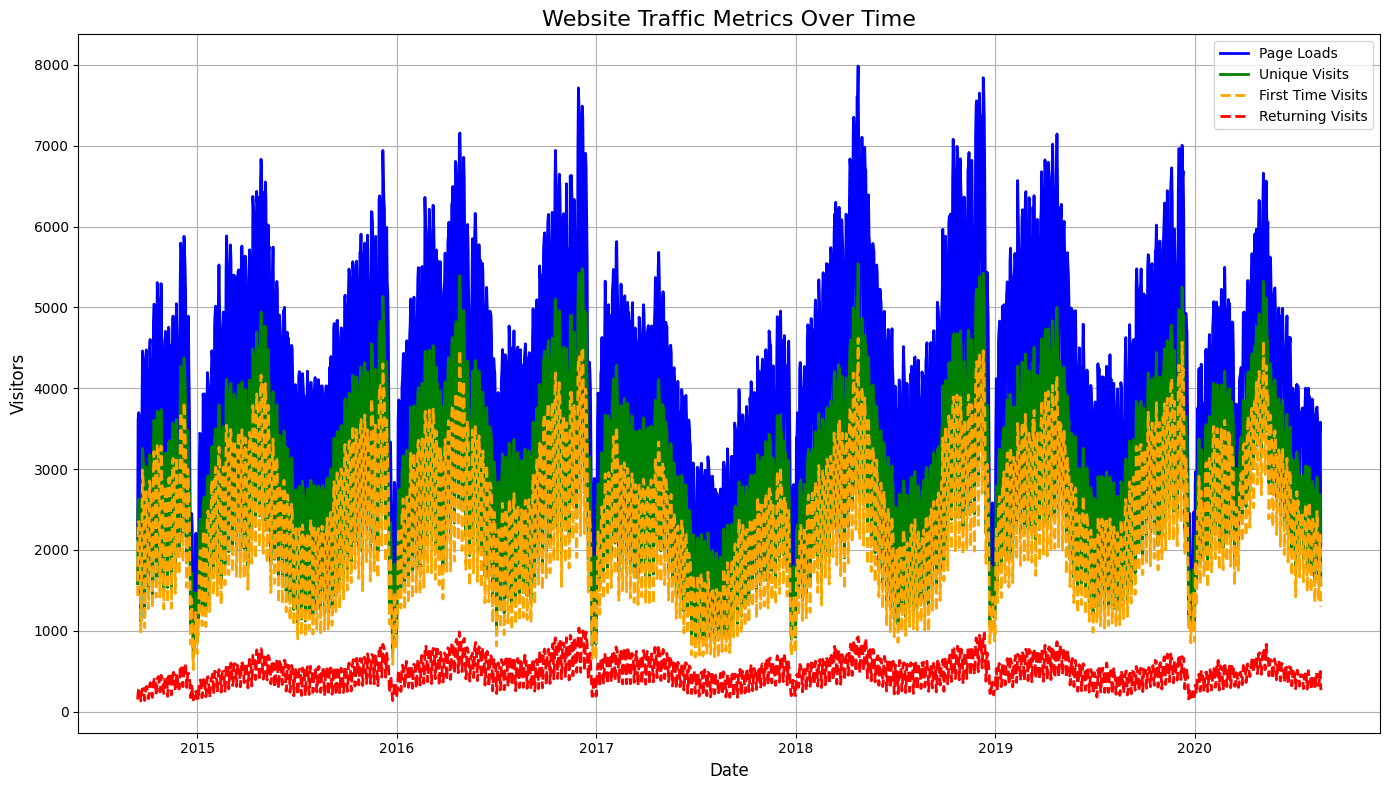

In [12]:
# Plotting overall traffic trends over time
plt.figure(figsize=(14, 8))

# Plot Page Loads, Unique Visits, First Time Visits, and Returning Visits over time
plt.plot(website_data['Date'], website_data['Page.Loads'], label='Page Loads', color='blue', linewidth=2)
plt.plot(website_data['Date'], website_data['Unique.Visits'], label='Unique Visits', color='green', linewidth=2)
plt.plot(website_data['Date'], website_data['First.Time.Visits'], label='First Time Visits', color='orange', linestyle='--', linewidth=2)
plt.plot(website_data['Date'], website_data['Returning.Visits'], label='Returning Visits', color='red', linestyle='--', linewidth=2)

plt.title('Website Traffic Metrics Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Visitors', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

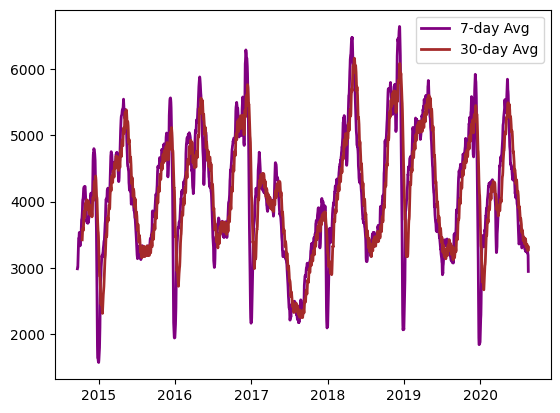

In [14]:
website_data['7_day_avg'] = website_data['Page.Loads'].rolling(window=7).mean()
website_data['30_day_avg'] = website_data['Page.Loads'].rolling(window=30).mean()

plt.plot(website_data['Date'], website_data['7_day_avg'], label='7-day Avg', color='purple', linestyle='-', linewidth=2)
plt.plot(website_data['Date'], website_data['30_day_avg'], label='30-day Avg', color='brown', linestyle='-', linewidth=2)
plt.legend()
plt.show()


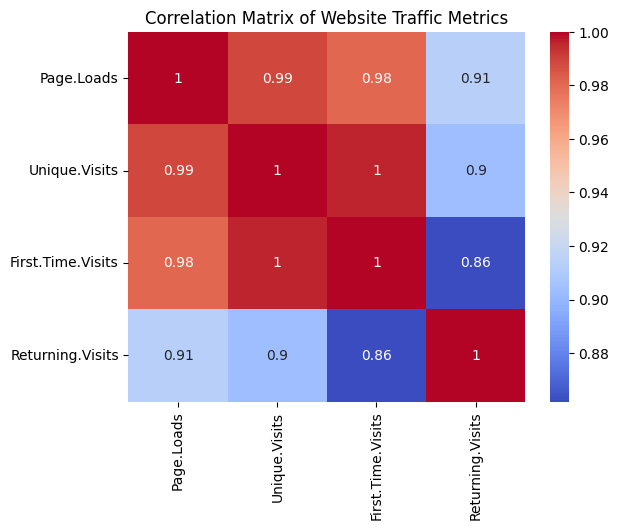

In [15]:
corr_matrix = website_data[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Website Traffic Metrics')
plt.show()


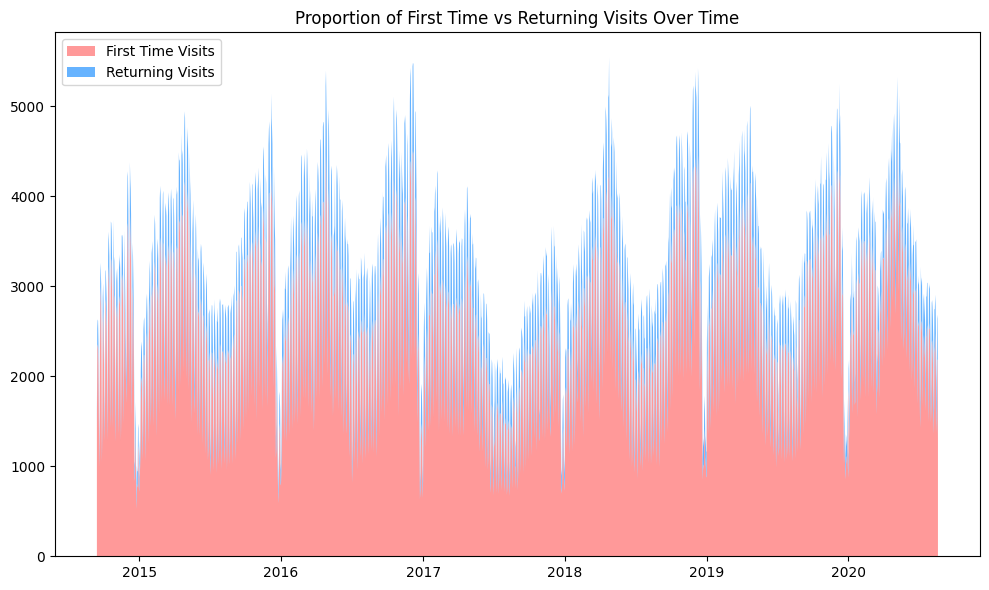

In [16]:
plt.figure(figsize=(10, 6))
plt.stackplot(website_data['Date'], website_data['First.Time.Visits'], website_data['Returning.Visits'], labels=['First Time Visits', 'Returning Visits'], colors=['#ff9999','#66b3ff'])
plt.legend(loc='upper left')
plt.title('Proportion of First Time vs Returning Visits Over Time')
plt.tight_layout()
plt.show()


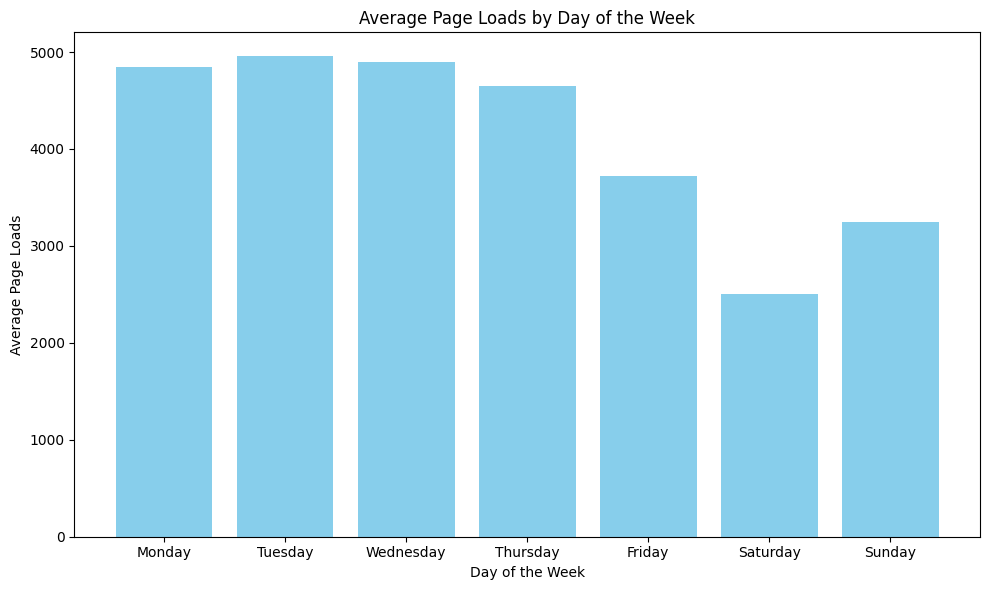

In [18]:
# Create the DayOfWeek column based on the 'Date' column
website_data['DayOfWeek'] = website_data['Date'].dt.day_name()

# Group the data by 'DayOfWeek' and calculate the mean of the numeric columns
# Ensure to group only numeric columns like 'Page.Loads'
day_of_week_traffic = website_data.groupby('DayOfWeek')[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].mean()

# Sort the day names to make the plot look better
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_traffic = day_of_week_traffic.reindex(day_order)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_traffic.index, day_of_week_traffic['Page.Loads'], color='skyblue')
plt.title('Average Page Loads by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Page Loads')
plt.tight_layout()
plt.show()


In [20]:
# Set 'Date' as the index and sort by date
website_data.set_index('Date', inplace=True)
website_data.sort_index(inplace=True)

In [21]:
train = website_data[:-30]
test = website_data[-30:]

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Page.Loads'], order=(5,1,0))
model_fit = model.fit()


forecast = model_fit.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


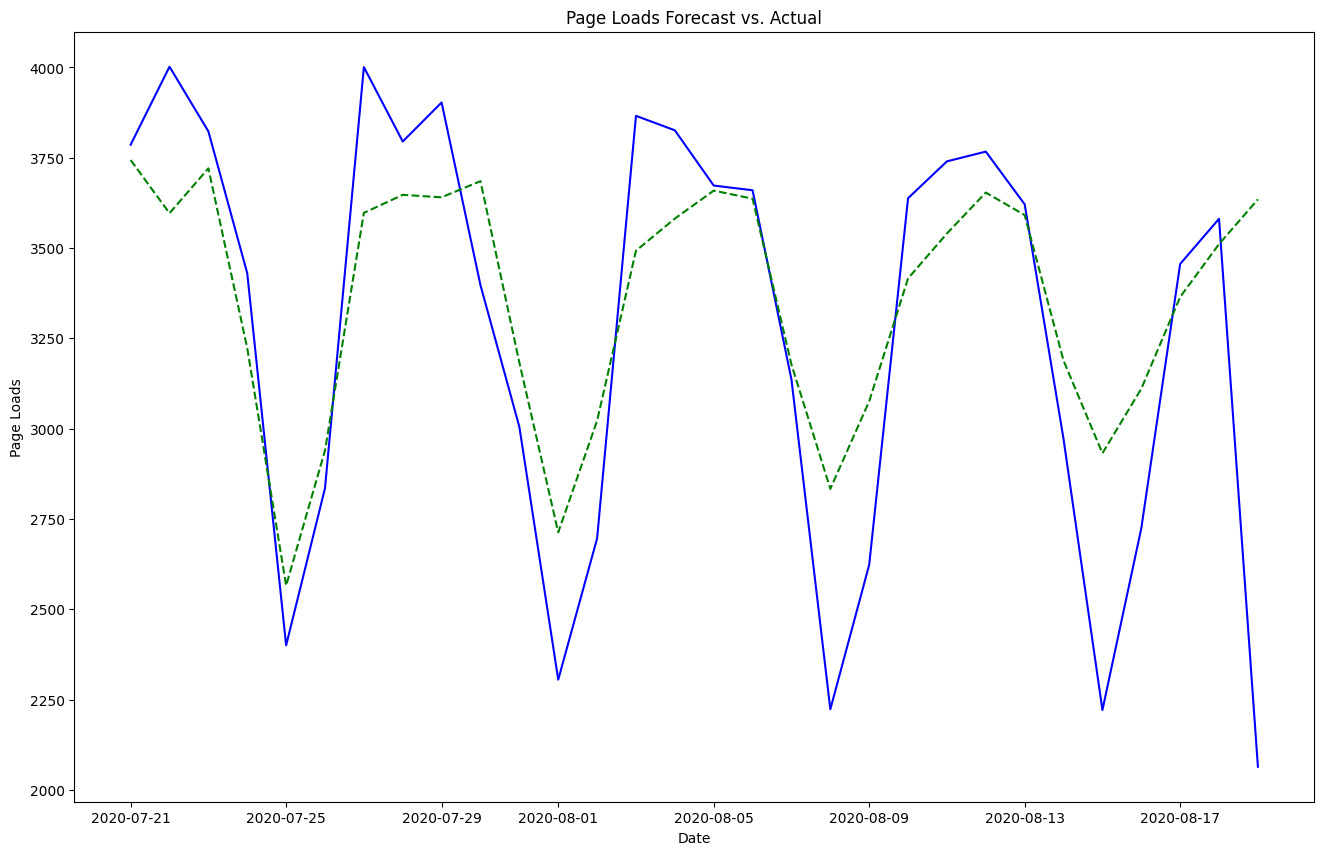

In [30]:
plt.figure(figsize=(16, 10))

plt.plot(test.index, test['Page.Loads'], label='Actual Page Loads', color='blue')
plt.plot(test.index, forecast, label='Forecasted Page Loads Data', color='green', linestyle='--')
plt.title('Page Loads Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxw8y_wg/n36bz_4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxw8y_wg/cfd4qqk_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63532', 'data', 'file=/tmp/tmprxw8y_wg/n36bz_4a.json', 'init=/tmp/tmprxw8y_wg/cfd4qqk_.json', 'output', 'file=/tmp/tmprxw8y_wg/prophet_model52enrl95/prophet_model-20241022153200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


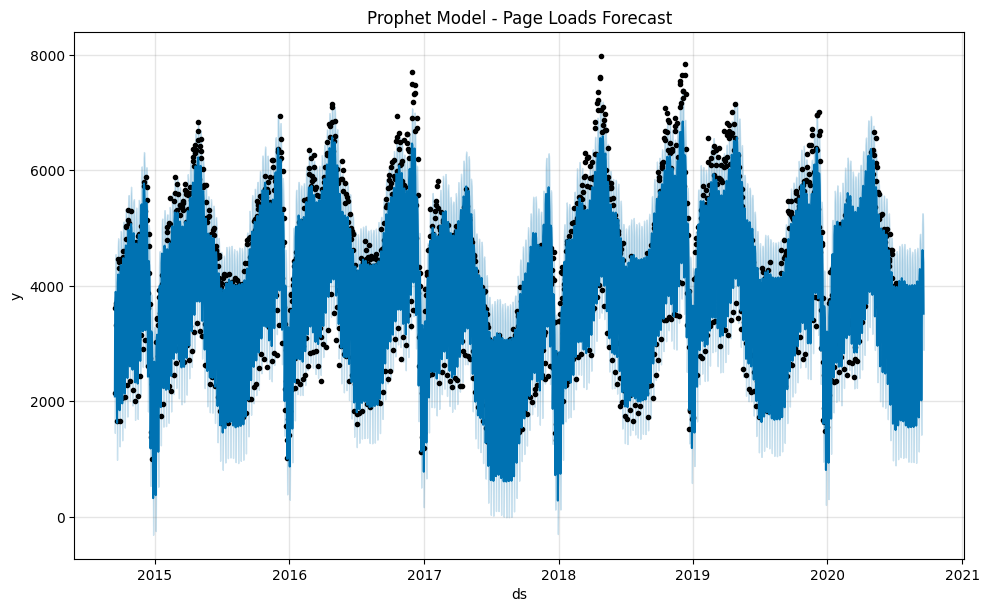

In [33]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = website_data.reset_index()[['Date', 'Page.Loads']]
df_prophet.columns = ['ds', 'y']  # Prophet expects 'ds' for date and 'y' for value

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Forecast the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Prophet Model - Page Loads Forecast')
plt.show()
